Imports the necessary libraries and sets up data table

In [9]:
import pandas
import numpy
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


#data = pandas.read_csv('minmax_normalised_trackdata.csv')
#data = pandas.read_csv('dupremoved_trackdata.csv')
#data = pandas.read_csv('softmax_normalised_trackdata.csv')
#data = pandas.read_csv('zscore_normalised_trackdata.csv')
data = pandas.read_csv('collinearity_removed.csv')

data.info()
genreMap = sorted(data["genre"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      6100 non-null   float64
 1   key               6100 non-null   int64  
 2   mode              6100 non-null   int64  
 3   speechiness       6100 non-null   float64
 4   acousticness      6100 non-null   float64
 5   instrumentalness  6100 non-null   float64
 6   liveness          6100 non-null   float64
 7   valence           6100 non-null   float64
 8   tempo             6100 non-null   float64
 9   duration_ms       6100 non-null   float64
 10  time_signature    6100 non-null   int64  
 11  genre             6100 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 572.0+ KB


Training and testing set creation 

In [11]:
#uncomment the first X if using anything that isn't collinearity_removed.csv
#X = data.drop(["name", "artist", "album", "duration_ms", "id", "genre"], axis=1)
#X = data.drop("genre", axis=1)
y = preprocessing.LabelEncoder().fit_transform(data["genre"])


Metrics using neural network

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


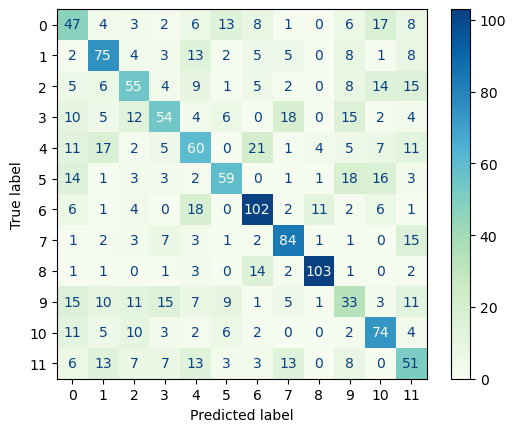

Accuracy: 0.523
Precision: 0.520
Recall: 0.520
['R&B', 'country', 'disco', 'electronic', 'folk', 'hiphop', 'jazz', 'metal', 'orchestral', 'pop', 'reggae', 'rock']


In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
model = neural_network.MLPClassifier(activation= 'tanh', max_iter= 10000000).fit(X_train, y_train)  


yPredicted = model.predict(X_test)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % metrics.accuracy_score(y_test, yPredicted))
print('Precision: %.3f' % metrics.precision_score(y_test, yPredicted, average="macro"))
print('Recall: %.3f' % metrics.recall_score(y_test, yPredicted, average="macro")) 
print(genreMap)

Metrics using K neighbors, k clusters found using elbow method

/Users/tuan/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


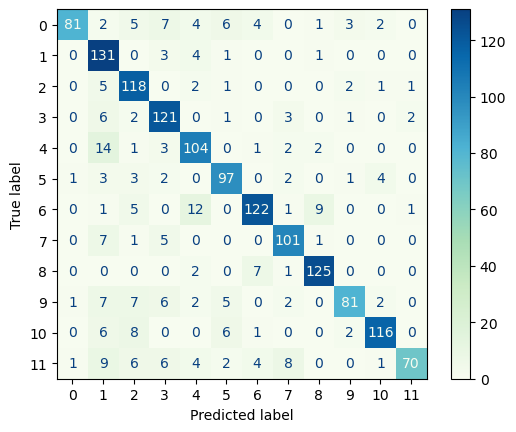

Accuracy: 0.512
['R&B', 'country', 'disco', 'electronic', 'folk', 'hiphop', 'jazz', 'metal', 'orchestral', 'pop', 'reggae', 'rock']


In [12]:
maxAccuracy = 0
for i in range(200) :
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    model = neighbors.KNeighborsClassifier(n_neighbors= i + 1, weights= 'distance', algorithm= 'brute')
    model.fit(X_train, y_train) 
    yPredicted = model.predict(X_test)
    if  metrics.accuracy_score(y_test, yPredicted) > maxAccuracy :
        bestX = X_test
        bestY = y_test
        bestPrediction = yPredicted
        maxAccuracy =  metrics.accuracy_score(y_test, yPredicted)

metrics.plot_confusion_matrix(model, bestX, bestY, cmap='GnBu')
plt.show()

print('Accuracy: %.3f' % maxAccuracy)
print(genreMap)
